#### COMPANION WORKBOOK

# Data Cleaning

To make the most out of this program, we strongly recommend you to:
1. First practice writing and implementing all of the code from Coding Section of the online module.
2. Then, freely experiment with and explore any interesting or confusing concepts. Simply insert new code cells and then use the help of Google and official documentation.
3. Finally, tackle all of the exercises at the end. They will help you tie everything together and **learn in context.**

#### <span style="color:#555">MODULE CODE SANDBOX</span>

Use this space to practice writing and implementing all of the code from Coding Section of the online module. Insert new code cells as needed, and feel free to write notes to yourself in Markdown.

## I. Drop Unwanted Observations

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)

import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

In [2]:
df = pd.read_csv('real_estate_data.csv')
df.head(10)

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002
5,265000,1,1,641,1947,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,146,10,23,27,86,9,60,52,28.0,15.0,86.0,168.0,58.0,8.0,3.0,2004
6,240000,1,1,642,1944,0,Single-Family,Brick,NaN,NaN,159,13,36,17,92,12,66,50,28.0,36.0,88.0,176.0,61.0,7.0,3.0,2011
7,388100,1,1,650,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,266.0,92.0,9.0,3.0,2005
8,240000,1,1,660,1983,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,51,8,6,2,40,18,32,41,36.0,49.0,77.0,188.0,65.0,6.0,3.0,2013
9,250000,1,1,664,1965,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,119,10,26,25,183,13,70,36,57.0,13.0,83.0,147.0,51.0,6.0,3.0,2007


In [3]:
print (df.shape)

(1883, 26)


In [4]:
df = df.drop_duplicates()

In [5]:
print (df.shape)

(1883, 26)


In [6]:
print (df.basement.unique())

[nan  1.]


In [7]:
df.basement.fillna(0, inplace=True)

In [8]:
print( df.basement.unique())

[0. 1.]


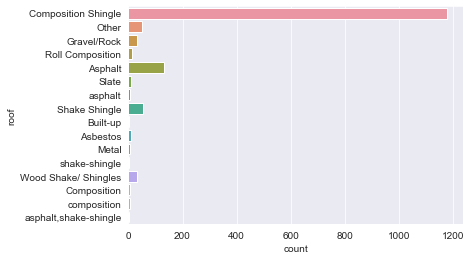

In [9]:
sns.countplot(y='roof', data=df)

In [10]:
# 'composition' should be 'Composition'
df.roof.replace('composition', 'Composition', inplace=True)

# 'asphalt' should be 'Asphalt'
df.roof.replace('asphalt', 'Asphalt', inplace=True)

# 'shake-shingle' and 'asphalt,shake-shingle' should be 'Shake Shingle'
df.roof.replace(['shake-shingle', 'asphalt,shake-shingle'], 'Shake Shingle',
                inplace=True)

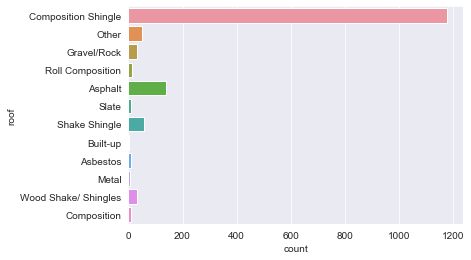

In [11]:
sns.countplot(y='roof', data=df)
plt.show()

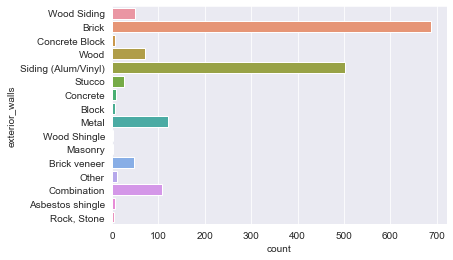

In [12]:
sns.countplot(y='exterior_walls', data=df)
plt.show()

## II. Fix Structural Errors

In [13]:
#Lol forgot to go down here :))

## III. Remove "Guilty" Outliers

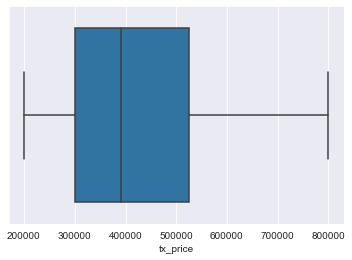

In [14]:
sns.boxplot(df.tx_price)
plt.show()

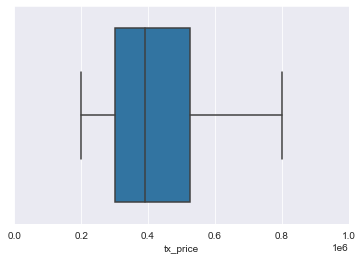

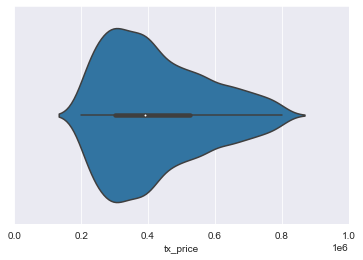

In [15]:
sns.boxplot(df.tx_price)
plt.xlim(0, 1000000)
plt.show()

sns.violinplot('tx_price', data=df)
plt.xlim(0, 1000000)
plt.show()

In [16]:
df.select_dtypes(include=['object']).isnull().sum()
# This shows us how many missing values there are in the data set

property_type       0
exterior_walls    223
roof              354
dtype: int64

In [17]:
df['exterior_walls'].fillna('Missing', inplace=True)

In [18]:
df.select_dtypes(include=['object']).isnull().sum()

property_type       0
exterior_walls      0
roof              354
dtype: int64

In [19]:
#How many missing values do we have by feature?
df.select_dtypes(exclude=['object']).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

## IV. Handle Missing Data

In [21]:
#lol once again

#### <span style="color:#555">EXERCISES</span>

Complete each of the following exercises.

## <span style="color:RoyalBlue">Exercise 2.1 - Coding Section Checkpoint</span>

Before moving on, it's imperative that you've been following along the online Coding Section of this module. Those are core to each module and often contain **mission-critical code**, which means that the following modules REQUIRE you to have run that code.

#### A.) First, check that you've correctly converted 'basement' into an indicator variable. Print the unique values of 'basement'.

In [22]:
print( df.basement.unique())

[0. 1.]


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
[0. 1.]
</pre>

#### B.) Next, confirm that you've fixed the typos and inconsistent capitalization in the 'roof' feature.

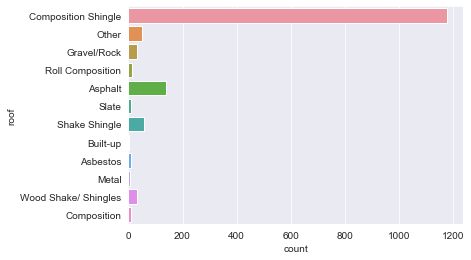

In [23]:
sns.countplot(y='roof', data=df)
plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="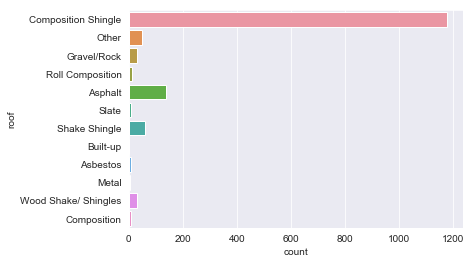&#10;">

## <span style="color:RoyalBlue">Exercise 2.2 - Repairing Walls</span>

In the coding section, we fixed the structural issues for the 'roof' feature. In this exercise, let's do the same for the other two categorical features, starting with **'exterior_walls'.**

#### A.) Just as refresher, plot the current class distribution for the 'exterior_walls' feature.

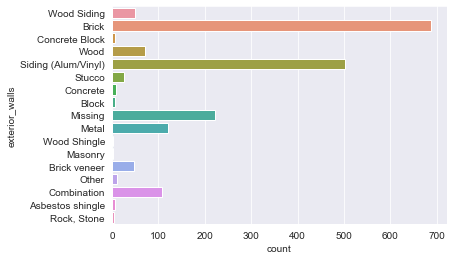

In [24]:
sns.countplot(y='exterior_walls', data=df)
plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="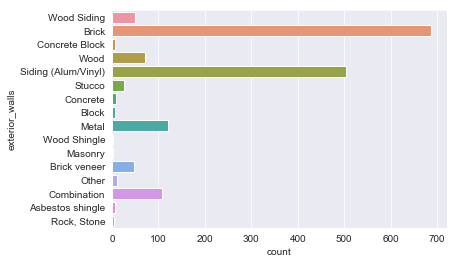&#10;">

As a reminder:
* <code style="color:crimson">'Rock, Stone'</code> should be <code style="color:crimson">'Masonry'</code>
* <code style="color:crimson">'Concrete'</code> and <code style="color:crimson">'Block'</code> should both just be <code style="color:crimson">'Concrete Block'</code>

Let's fix those issues in this exercise.

#### B.) First, replace any instances of <code style="color:steelblue">'Rock, Stone'</code> with <code style="color:steelblue">'Masonry'</code> instead.
* Remember to do it "inplace."

In [25]:
df.exterior_walls.replace('Rock, Stone', 'Masonry', inplace=True)

#### C.) Next, replace any instances of <code style="color:steelblue">'Concrete'</code> or <code style="color:steelblue">'Block'</code> with <code style="color:steelblue">'Concrete Block'</code> instead.
* Remember to do it "inplace."

In [26]:
df.exterior_walls.replace(['Concrete', 'Block'], 'Concrete Block', inplace=True)


#### D.) Great, now plot the bar plot of <code style="color:steelblue">'exterior_walls'</code> to see its new distribution.

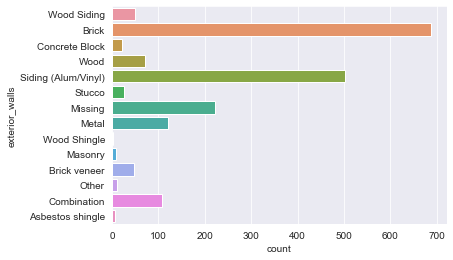

In [27]:
sns.countplot(y='exterior_walls', data=df)
plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="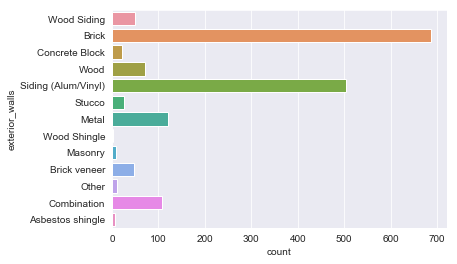&#10;">

Two down, one to go. Do you remember the name of the last categorical feature? If not, no worries. It's very simple to check, and it's very common to do these ad-hoc checks throughout your project.

#### E.) List the categorical features in the dataset.
* **Tip:** What is the 'dtype' for categorical features?

In [28]:
df.dtypes[df.dtypes == 'object']

property_type     object
exterior_walls    object
roof              object
dtype: object

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
property_type     object
exterior_walls    object
roof              object
dtype: object
</pre>

#### F.) Finally, display the class distributions for the 'property_type' feature.
* Does it appear to have any obvious structural errors?

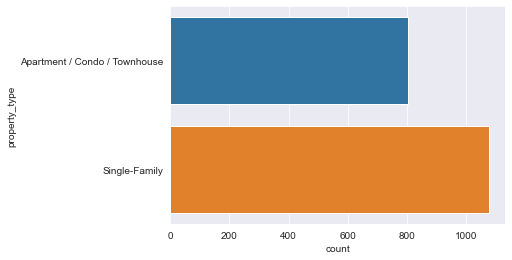

In [29]:
sns.countplot(y='property_type', data=df)
plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="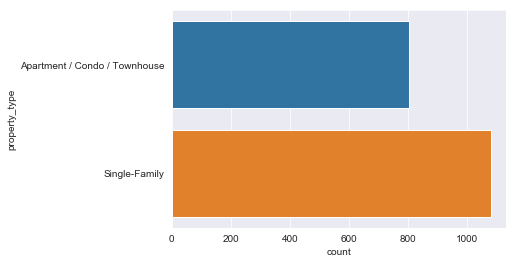&#10;">

## <span style="color:RoyalBlue">Exercise 2.3 - The Music of Outliers</span>

#### A.) Plot the violin plots for <code style="color:steelblue">'beds'</code>, <code style="color:steelblue">'sqft'</code>, and <code style="color:steelblue">'lot_size'</code>.
* **Tip:** If you want to plot multiple charts in the same code cell, remember to separate them by <code style="color:steelblue">plt.show()</code>, or else they will overlap.
* Among those features, do any look like they have potential outliers?

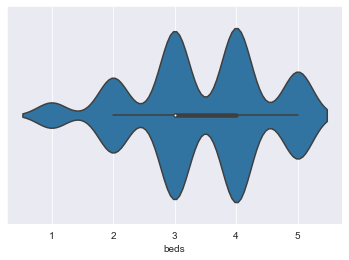

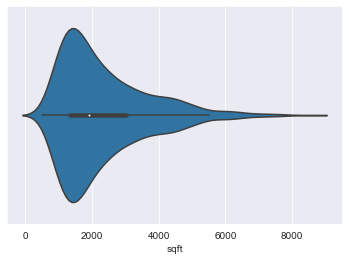

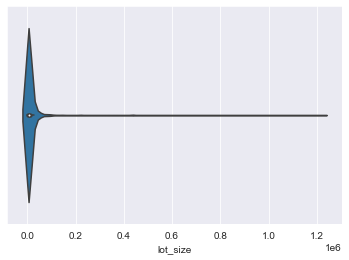

In [30]:
# Violin plot of beds
sns.violinplot(df.beds)
plt.show()

# Violin plot of sqft
sns.violinplot(df.sqft)
plt.show()

# Violin plot of lot_size
sns.violinplot(df.lot_size)
plt.show()


Among those three features, it looks like <code style="color:steelblue">lot_size</code> has a potential outlier! Look at its long and skinny tail. Let's look at the largest 5 lot sizes just to confirm.

#### B.) Sort <code style="color:steelblue">df.lot_size</code> and display the top 5 samples.
* You can sort a Series with the <code style="color:steelblue">.sort_values()</code> function.
* **Tip:** <code style="color:steelblue">.sort_values()</code> has an argument called <code style="color:steelblue">ascending=</code>. By default, it's <code style="color:steelblue">True</code>
* **Tip:** You can chain functions together. This exercise can be completed in 1 line of code.

In [31]:
df.lot_size.sort_values(ascending=False).head(10)

102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
1839     435600
1817     435600
1570     435600
1852     351529
1479     343252
Name: lot_size, dtype: int64

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64
</pre>

The largest property has a lot_size of 1,220,551 sqft. The next largest has a lot_size of only 436,471 sqft. Holy smokes! Let's look at this observation a bit closer.

#### C.) Display the entire row for that observation with the huge lot size.
* How many bedrooms and bathrooms does the property have?
* What's its property type?
* What's its transaction price?
* **Do you think this observation could be a "guilty" outlier? Why?**

In [32]:
df[df.lot_size == df.lot_size.max()]

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
102,292999,2,1,875,1950,1220551,Apartment / Condo / Townhouse,Brick,NaN,0.0,63,11,11,8,39,18,42,44,33.0,35.0,87.0,230.0,79.0,6.0,3.0,2014


<strong style="color:RoyalBlue">Expected output:</strong>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>tx_price</th>
      <th>beds</th>
      <th>baths</th>
      <th>sqft</th>
      <th>year_built</th>
      <th>lot_size</th>
      <th>property_type</th>
      <th>exterior_walls</th>
      <th>roof</th>
      <th>basement</th>
      <th>restaurants</th>
      <th>groceries</th>
      <th>nightlife</th>
      <th>cafes</th>
      <th>shopping</th>
      <th>arts_entertainment</th>
      <th>beauty_spas</th>
      <th>active_life</th>
      <th>median_age</th>
      <th>married</th>
      <th>college_grad</th>
      <th>property_tax</th>
      <th>insurance</th>
      <th>median_school</th>
      <th>num_schools</th>
      <th>tx_year</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>102</th>
      <td>292999</td>
      <td>2</td>
      <td>1</td>
      <td>875</td>
      <td>1950</td>
      <td>1220551</td>
      <td>Apartment / Condo / Townhouse</td>
      <td>Brick</td>
      <td>NaN</td>
      <td>0.0</td>
      <td>63</td>
      <td>11</td>
      <td>11</td>
      <td>8</td>
      <td>39</td>
      <td>18</td>
      <td>42</td>
      <td>44</td>
      <td>33.0</td>
      <td>35.0</td>
      <td>87.0</td>
      <td>230.0</td>
      <td>79.0</td>
      <td>6.0</td>
      <td>3.0</td>
      <td>2014</td>
    </tr>
  </tbody>
</table>

#### D.) Since all of the other observations are below 500,000 sqft, let's remove observations with <code style="color:steelblue">lot_size</code> greater than 500,000 sqft.
* You can use a boolean mask to do so (filter to keep only wanted observations).
* Overwrite the existing <code style="color:steelblue">df</code> object
* Print the length of the new <code style="color:steelblue">df</code> object.

In [33]:
print (len(df))
df = df[df.lot_size <= 500000]
print (len(df))

1883
1882


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
1882
</pre>

## <span style="color:RoyalBlue">Exercise 2.4 - Missing But Not Lost</span>

In the Coding Section, we already labeled missing values in the 'exterior_walls' feature as 'Missing'. Now, we'll write a loop for labeling missing values in ALL of our categorical features so that we can dynamically handle as many categorical features as necessary.

#### A.) Write a loop that fills all the missing values for categorical features with the value <code style="color:steelblue">'Missing'</code>.
* **Tip:** There's a shortcut for looping through categorical column names:

<pre style="color:#bbb">
for column in <strong style="color:steelblue">df.select_dtypes(include=['object'])</strong>:
    # code block
</pre>

In [34]:
for column in df.select_dtypes(include=['object']):
    df[column].fillna('Missing', inplace=True)

#### B.) Now, display the number of missing values for each categorical feature.

In [35]:
df.select_dtypes(include=['object']).isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
property_type     0
exterior_walls    0
roof              0
dtype: int64
</pre>

#### C.) Just for practice, find and count missing values in your numerical features.

In [36]:
df.select_dtypes(exclude=['object']).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64
</pre>

#### D.) Save your cleaned dataframe as <code style="color:steelblue">'cleaned_df.csv'</code>.

Before we move on to the next module, let's save the new dataframe we worked hard to clean.
* We'll use Pandas's <code style="color:steelblue">.to_csv()</code> function.
* Set <code style="color:steelblue">index=<span style="color:crimson">None</span></code> so that Pandas drops the indices and only stores the actual data in the CSV.

In [37]:
df.to_csv('super_cleaned_df.csv', index=None)

In [38]:
print( len(abt.columns))

NameError: name 'abt' is not defined

* Now we can use <code style="color:steelblue">'cleaned_df.csv'</code> in all the other modules!

Congratulations for making it through the Data Cleaning module! Data cleaning is not the most exciting thing in the world, but it can literally make or break your project. As a reminder, here are a few things you did in this module:
* You confirmed that the dataset doesn't have any duplicate and irrelevant observations.
* You fixed various structural errors, such as mislabeled classes.
* You removed an outlier after plotting violin plots.
* And you labeled missing data in your categorical features.

All of this cleaning will be extremely helpful for the remaining modules. In the next module, Feature Engineering, you'll use your cleaned dataset to create new features that will improve model performance.